# <span style="color:blue">Inheritance and Polymorphism
AWS CLOUD INSTITUTE: PROVIDED FOR EDUCATIONAL INSTRUCTIONAL PURPOSES ONLY.

# <span style="color:blue"> Inheritance

# Single/Hierarchical Inheritance

There is very **little difference between single and hierarchical inheritance**. In fact in many cases when people use "single inheritance" it can apply to both. The **major difference** is **between single vs multiple inheritance**. We'll start with the single inheritance example.

## Basic Player Hierarchy

Attached below is the basic player hierarchy for this example.

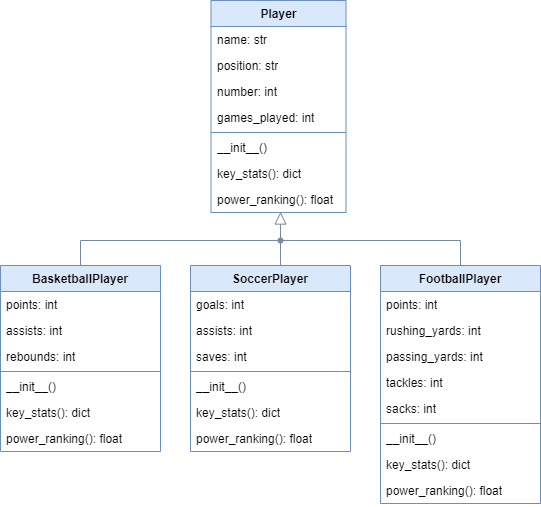

## Player base class

This is the **top parent class** in the player hierarchy. It will include the **common attributes and methods** across all types of players.

In [ ]:
class Player:
    '''
    A class used to represent a player
    '''

    def __init__(self, name, position = None, number = None, games_played = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            games_played(int): number of games played by the player
        '''
        # initialize object data
        self.name = name
        self.position = position
        self.number = number
        self.games_played = games_played

    def power_ranking(self):
        '''
        Generates a ranking number for the player based on their stats.
        This is defined in the base class, but it must be specialized in the individual derived classes.

        Returns:
            Float number for the ranking value
        '''
        pass

    def key_stats(self):
        '''
        This method returns a Python dictionary with the most important stats for a player.
        This is defined in the base class, but it must be specialized in the individual derived classes.

        Returns:
            Dictionary with the most important stats for a player
        '''
        # at the base class level, the only stat would be games played
        return {
            "Games Played": self.games_played
        }

        
    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Player: {self.name} - Position: {self.position} - Number: {self.number} - Games: {self.games_played}"
        

## Derived Player classes

Now we define **three derived classes** to represent **players for basketball, soccer and football** (american football). Note that **most** of the **attributes can be shared**, **but** some **key stats in each sport** will be **different**. So **take note** of the **different instance variables** each class has.

#### The *super()* method

In the derived classes, we see the *super()* method frequently being used. ***super()* is used to refer to the parent class**, when we want to invoke a method or refer to data on it. We **could also use the parent class name** (such as *Player* in this case), but ***super()*** is **more generic**, because we **could change our hierarchy** in the future. 

### BasketballPlayer class

In [ ]:
class BasketballPlayer(Player):
    '''
    A class used to represent a basketball player
    '''

    def __init__(self, name, position = None, number = None, games_played = 0, points = 0, rebounds = 0, assists = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            games_played(int): number of games played by the player
            points(int): number of points scored
            rebounds(int): number of rebounds
            assists(int): number of assists
        '''
        # initialize object data using super class
        super().__init__(name, position, number, games_played)

        # initialize basketball specifica instance variables
        self.points = points
        self.rebounds = rebounds
        self.assists = assists

    """ Commenting out key_stats at first, to discuss overriding
    def key_stats(self):
        '''
        This method returns a Python dictionary with the most important stats for a player.
        This is defined in the base class, but it must be specialized in the individual derived classes.

        Returns:
            Dictionary with the most important stats for a player
        '''
        return {
            "Games Played": self.games_played,
            "Power Ranking": self.power_ranking(),
            "Points": self.points,
            "Rebounds": self.rebounds,
            "Assists": self.assists
        }
     """
        
    def power_ranking(self):
        '''
        Generates a ranking number for the player based on their stats. This is a somewhat arbitrary formula that is
        specific to the stats of the sport.

        Returns:
            Float number for the ranking value, rounded to 2 decimal places
        '''
        return round(((self.points * 2) + self.rebounds + (self.assists * 1.5)) / self.games_played, 2)
    
    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        # use super() to generate string for common data, and append the child data to it
        return f"{super().__str__()} - Points: {self.points} - Rebounds: {self.rebounds} - Assists: {self.assists}"

### SoccerPlayer class

In [ ]:
class SoccerPlayer(Player):
    '''
    A class used to represent a soccer player
    '''

    def __init__(self, name, position = None, number = None, games_played = 0, goals = 0, assists = 0, saves = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            games_played(int): number of games played by the player
            goals(int): number of goals scored
            assists(int): number of assists
            saves(int): number of saves
        '''
        # initialize object data using super class
        super().__init__(name, position, number, games_played)

        # initialize soccer specific instance variables
        self.goals = goals
        self.assists = assists
        self.saves = saves
        
    def key_stats(self):
        '''
        This method returns a Python dictionary with the most important stats for a player.
        This is defined in the base class, but it must be specialized in the individual derived classes.

        Returns:
            Dictionary with the most important stats for a player
        '''
        # goalies have very different stats, so return the appropriate stats based on the postion
        if self.position == "goalkeeper":
            return {
                "Games Played": self.games_played,
                "Power Ranking": self.power_ranking(),
                "Goals Allowed": self.goals,
                "Saves": self.saves
            }
        else:
            return {
                "Games Played": self.games_played,
                "Power Ranking": self.power_ranking(),
                "Goals": self.goals,
                "Assists": self.assists
            }
 
    def power_ranking(self):
        '''
        Generates a ranking number for the player based on their stats. This is a somewhat arbitrary formula that is
        specific to the stats of the sport.

        Returns:
            Float number for the ranking value, rounded to 2 decimal places
        '''
        return round((10*((self.goals * 3) + (self.assists * 2) + self.saves)) / self.games_played, 2)
    
    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        # use super() to generate string for common data, and append the child data to it
        return f"{super().__str__()} - Goals: {self.goals} - Assists: {self.assists} - Saves: {self.saves}"

### FootballPlayer class

In [ ]:
class FootballPlayer(Player):
    '''
    A class used to represent a football player
    '''

    # class variable to define different positions
    offensive_positions = ["quarterback", "running back", "wide receiver", "tight end"]
    defensive_positions = ["linebaker", "defensive back", "safety"]
    
    def __init__(self, name, position = None, number = None, games_played = 0, points = 0, rushing_yards = 0, passing_yards = 0, tackles = 0, sacks = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            games_played(int): number of games played by the player
            points(int): number of points scored
            rushing_yards(int): number of rushing yards
            passing_yards(int): number of passing yards
            tackles(int): number of tackles
            sacks(int): number of sacks
        '''
        # initialize object data using super class
        super().__init__(name, position, number, games_played)

        # initialize football specific instance variables
        self.points = points
        self.rushing_yards = rushing_yards
        self.rushing_yards = rushing_yards
        self.passing_yards = passing_yards
        self.tackles = tackles
        self.sacks = sacks

    def key_stats(self):
        '''
        This method returns a Python dictionary with the most important stats for a player.
        This is defined in the base class, but it must be specialized in the individual derived classes.

        Returns:
            Dictionary with the most important stats for a player
        '''
        # Defensive players and offensive players have different key stats, so return appropriate ones
        if self.position in self.defensive_positions:
            return {
                "Games Played": self.games_played,
                "Power Ranking": self.power_ranking(),
                "Sacks": self.sacks,
                "Tackles": self.tackles
            }
        else:
            return {
                "Games Played": self.games_played,
                "Power Ranking": self.power_ranking(),
                "Points": self.points,
                "Rushing Yards": self.rushing_yards,
                "Passing Yards": self.passing_yards
            }
        
    def power_ranking(self):
        '''
        Generates a ranking number for the player based on their stats. This is a somewhat arbitrary formula that is
        specific to the stats of the sport.

        Returns:
            Float number for the ranking value, rounded to 2 decimal places
        '''
        return round(((self.points * 2) + (self.rushing_yards * 1.5) +
                     (self.passing_yards * 1.5) + (self.tackles * 50) - (self.sacks * 100)) / self.games_played, 2)
        
    
    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        # use super() to generate string for common data, and append the child data to it
        return f"{super().__str__()} - Points: {self.points} - Rushing Yards: {self.rushing_yards} - Passing Yards: {self.passing_yards} - Tackles: {self.tackles} - Sacks: {self.sacks}"

### Creating players from the child classes

#### Soccer players

In [ ]:
# Create soccer players
sp1 = SoccerPlayer("Ronaldo", "striker", 9, games_played = 8, goals = 6, assists = 1, saves = 0)
sp2 = SoccerPlayer("Ronaldinho", "midfielder", games_played = 10, goals = 3, assists = 3, saves = 0)
sp3 = SoccerPlayer("Messi", "striker", games_played = 12, goals = 7, assists = 2, saves = 0)
sp4 = SoccerPlayer("Fillol", "goalkeeper", games_played = 9, goals = 0, assists = 0, saves = 12)
sp5 = SoccerPlayer("Tab Ramos", "midfielder", games_played = 8, goals = 4, assists = 2, saves = 0)
sp6 = SoccerPlayer("Alexis Lala", "defender", games_played = 11, goals = 0, assists = 1, saves = 0)

# print player name to confirm creation
print(f"Player: {sp1.name}")	
print(f"Player: {sp2.name}")
print(f"Player: {sp3.name}")
print(f"Player: {sp4.name}")	
print(f"Player: {sp5.name}")
print(f"Player: {sp6.name}")

#### Basketball players

In [ ]:
# create basketball players
bp1 = BasketballPlayer("Michael Jordan", "guard", 23, games_played = 60, points = 432, rebounds = 33, assists = 75)
bp2 = BasketballPlayer("LeBron James", "forward", 23, games_played = 62, points = 422, rebounds = 41, assists = 85)
bp3 = BasketballPlayer("Kobe Bryant", "guard", 24, games_played = 53, points = 235, rebounds = 21, assists = 88)
bp4 = BasketballPlayer("Magic Johnson", "guard", 12, games_played = 67, points = 221, rebounds = 75, assists = 109)
bp5 = BasketballPlayer("Larry Bird", "forward", 12, games_played = 58, points = 387, rebounds = 89, assists = 25)
bp6 = BasketballPlayer("Shaquille O'neal ", "center", 34, games_played = 55, points = 345, rebounds = 125, assists = 5)

# print player name to confirm creation
print(f"Player: {bp1.name}")
print(f"Player: {bp2.name}")
print(f"Player: {bp3.name}")
print(f"Player: {bp4.name}")
print(f"Player: {bp5.name}")
print(f"Player: {bp6.name}")

#### Football players

In [ ]:
# create football players
fp1 = FootballPlayer("Tom Brady", "quarterback", 12, games_played = 63, points = 342, rushing_yards = 123, passing_yards = 2389, tackles = 0, sacks = 1)
fp2 = FootballPlayer("Troy Aikman", "quarterback", 8, games_played = 40, points = 216, rushing_yards = 45, passing_yards = 1512, tackles = 0, sacks = 0)
fp3 = FootballPlayer("Emmitt Smith", "running back", 22, games_played = 42, points = 339, rushing_yards = 1235, passing_yards = 12, tackles = 1, sacks = 0)
fp4 = FootballPlayer("Walter Payton", "running back", 34, games_played = 44, points = 332, rushing_yards = 1125, passing_yards = 8, tackles = 0, sacks = 0)
fp5 = FootballPlayer("Deion Sanders", "defensive back", 21, games_played = 32, points = 65, rushing_yards = 25, passing_yards = 0, tackles = 53, sacks = 0)
fp6 = FootballPlayer("Lawrance Taylor", "linebacker", 56, games_played = 48, points = 12, rushing_yards = 0, passing_yards = 0, tackles = 123, sacks = 57)

# print player name to confirm creation
print(f"Player: {fp1.name}")
print(f"Player: {fp2.name}")
print(f"Player: {fp3.name}")
print(f"Player: {fp4.name}")
print(f"Player: {fp5.name}")
print(f"Player: {fp6.name}")

### Accessing data and methods across hierarchy
**When** we **invoke methods and retrieve data from** the **child objects**, **some** of them might **come from** the **parent class**, while **others** come **from** the **derived class**. This is **transparent to the caller**.

In **these examples**, the **attributes come from the parent class** ...

In [ ]:
# print player name, position from a mix of all sports
print(f"Player: {sp1.name} - Position: {sp1.position}")	
print(f"Player: {sp2.name} - Position: {sp2.position}")
print(f"Player: {bp3.name} - Position: {bp3.position}")
print(f"Player: {bp4.name} - Position: {bp4.position}")	
print(f"Player: {fp5.name} - Position: {fp5.position}")
print(f"Player: {fp6.name} - Position: {fp6.position}")

But in **these examples**, the **power ranking** is **resolved by** the **individual *power_ranking()* methods in** the **specific children** classes ...

In [ ]:
# print sample of player power rankings
print(f"Player: {fp1.name} - Power Ranking: {fp1.power_ranking()}")
print(f"Player: {fp2.name} - Power Ranking: {fp2.power_ranking()}")
print(f"Player: {sp3.name} - Power Ranking: {sp3.power_ranking()}")
print(f"Player: {sp4.name} - Power Ranking: {sp4.power_ranking()}")
print(f"Player: {bp5.name} - Power Ranking: {bp5.power_ranking()}")
print(f"Player: {bp6.name} - Power Ranking: {bp6.power_ranking()}")

## Method Overriding

Method overriding is when a **subclass provides** a **specific implementation** of a **method** that has **already** been **defined in** one of its **parent classes**.

**In our example**, this is **demonstrated with** the ***key_stats()*** method. **There is a default** definition **in the base class** *Player*, which **returns just the games played**, since that's the only information available in the base class. 

The **child classes override the method**, **providing** the correct **full stats** for that sport. However, note that in our **initial implementation the *BasketballPlayer*** class has the **method commented out**. So **what will happen?**

##### Print key stats for soccer players and football players, which have key_stats method

In [ ]:
print(f"Soccer stats: for {sp1.name}: {sp1.key_stats()}")
print(f"Football stats: for {fp3.name}: {fp1.key_stats()}")

##### Print key stats for basketball players, which do NOT have a key_stats method

In [ ]:
print(f"Basketball stats: for {bp2.name}: {bp2.key_stats()}")
print(f"Basketball stats: for {bp5.name}: {bp5.key_stats()}")

If we **go back to the BasketballPlayer class**, and **comment in the key_stats() method**. **Then recreate and print** the **basketball players** below, and **see** the **full stats** appear.

In [ ]:
# create basketball players
bp1 = BasketballPlayer("Michael Jordan", "guard", 23, games_played = 60, points = 432, rebounds = 33, assists = 75)
bp2 = BasketballPlayer("LeBron James", "forward", 23, games_played = 62, points = 422, rebounds = 41, assists = 85)
bp3 = BasketballPlayer("Kobe Bryant", "guard", 24, games_played = 53, points = 235, rebounds = 21, assists = 88)
bp4 = BasketballPlayer("Magic Johnson", "guard", 12, games_played = 67, points = 221, rebounds = 75, assists = 109)
bp5 = BasketballPlayer("Larry Bird", "forward", 12, games_played = 58, points = 387, rebounds = 89, assists = 25)
bp6 = BasketballPlayer("Shaquille O'neal ", "center", 34, games_played = 55, points = 345, rebounds = 125, assists = 5)

# print player name to confirm creation
print(f"Basketball stats: for {bp2.name}: {bp2.key_stats()}")
print(f"Basketball stats: for {bp5.name}: {bp5.key_stats()}")

# Multiple Inheritance

### Example: Professional Basketball Player

In the example below, we have a ***ProfessionalBaskteballPlayer*** class that **inherits from both** the ***BasketballPlayer*** class and a new ***Professional*** class.

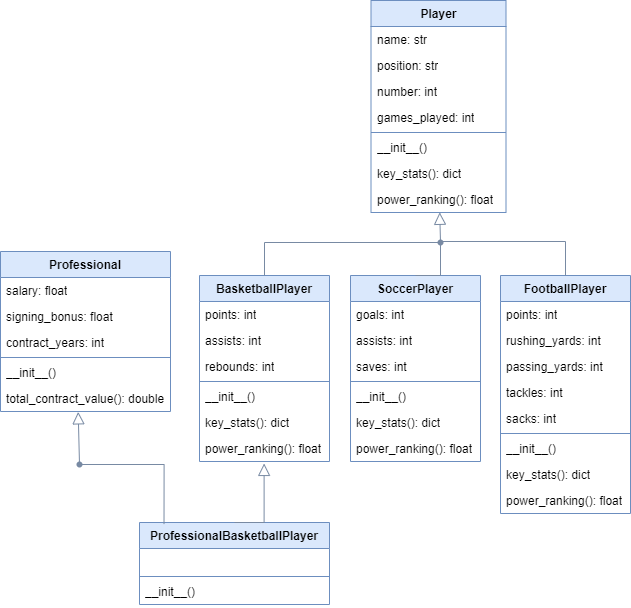

#### Questions
**Q**: **Why didn't put** the **new attributes and methods in** the ***BasketballPlayer*** class <br>
**A**: Because we **also have players who are amateurs**, and those fields would not make any sense for them
<br><br>
**Q**: **Why** did we **need a separate *Professional* class**? Why didn't we just put the new attributes and methods in *ProfessionalBasketballPlayer*<br>
**A**: We'll get back to that ...

### Professional class
First we create the new class

In [ ]:
class Professional:
    '''
    This class represents data about a professional under a contract
    '''
    def __init__(self, salary = 0, signing_bonus = 0, contract_length = 0):
        '''
        Parameters:
            salary(float): yearly salary
            signing_bonus: initial signing bonus (only paid first year)
            contract_length(int): length of the contract in years
        '''
        # initialize object data
        self.salary = salary
        self.signing_bonus = signing_bonus
        self.contract_length = contract_length

    def total_contract_value(self):
        '''
        Calculates total contract value, which is the sum of the salary over the years, plus the signing bonus

        Returns:
            Float number for the total contract value
        '''
        return (self.salary * self.contract_length) + self.signing_bonus

    def __str__(self):
        '''
        Returns string representation of the object.

        Returns:
            String representation for the object data
        '''
        return f"Salary: ${self.salary:,.2f} - Signing Bonus: ${self.signing_bonus:,.2f} - Contract Length: {self.contract_length} years"

### ProfessionalBasketball Player class
Now we **create the *ProfessionalBasketballPlayer* class**, which **inherits from both** ***Professional* and *BasketballPlayer***

**Take** special notice of **how we invoke the super methods in** the **constructor**.

In [ ]:
class ProfessionalBasketballPlayer(BasketballPlayer, Professional):
    '''
    This class represents a professional basketball player, so it inherits from both the BasketballPlayer and Professional classes
    '''
    def __init__(self, name, position = None, number = None, games_played = 0, points = 0, rebounds = 0, assists = 0, 
                 salary = 0, signing_bonus = 0, contract_length = 0):
        '''
        Parameters:
            name(str): player name
            position(str): player position
            number(int): player number
            games_played(int): number of games played by the player
            points(int): number of points scored
            rebounds(int): number of rebounds
            assists(int): number of assists
            salary(float): yearly salary
            signing_bonus: initial signing bonus (only paid first year)
            contract_length(int): length of the contract in years
        '''
        # initialize object data from Basketball player class
        BasketballPlayer.__init__(self, name, position, number, games_played, points, rebounds, assists)
        
       # initialize object data from Professional class
        Professional.__init__(self, salary, signing_bonus, contract_length)

    def __str__(self):
        '''
        Returns string representation of the object. This will combine the __str__ methods of both parent classes

        Returns:
            String representation for the object data
        '''
        return f"{BasketballPlayer.__str__(self)} - {Professional.__str__(self)}"
        

#### Create *ProfessionalBasketballPlayer* objects

In [ ]:
# create professional basketball players
pbp1 = ProfessionalBasketballPlayer("Stephan Curry", "guard", 30, games_played = 82, points = 317, rebounds = 58, assists = 57,
                                    salary = 38500000, signing_bonus = 15000000, contract_length = 2)
pbp2 = ProfessionalBasketballPlayer("Tim Duncan", "forward", 17, games_played = 58, points = 182, rebounds = 41, assists = 25,
                                    salary = 25000000, signing_bonus = 10000000, contract_length = 3)

# print professional basketball players
print(pbp1)
print(f"Total contract value: {pbp1.total_contract_value():,.2f}\n")
print(pbp2)
print(f"Total contract value: {pbp2.total_contract_value():,.2f}\n")

#### Back to our question ...
**Q**: **Why** did we need a **separate *Professional* class**? Why didn't we just put the new attributes and methods in *ProfessionalBasketballPlayer*<br>
**A**: Because the *Professional* class **can also be used** for **other types** of prefessionals.

For instance, a team **coach** is **not a player**, **but can also be** either **amateur or professional**.

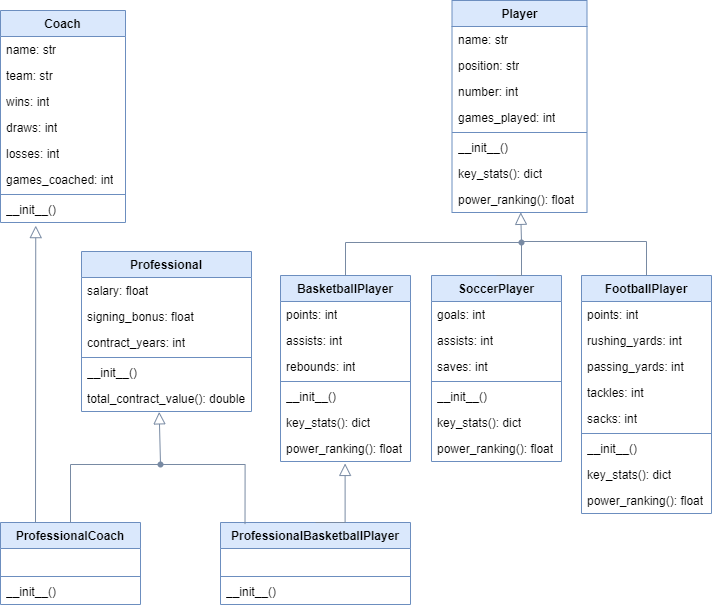

We're not showing the Coach class here, but you should get the idea.

# Polymorphism

## Player Card Printer Scenario

For this scenario, **assume** you are in the business of **printing Player Cards for all sports**. Player Cards are very common in America. They'll have a **picture of a player in one side**, and **critical stats in the other**. Kids (and adults) will often collect them. We **won't be printing pictures** here, **but** we will **simulate** a **virtual card with stats**. 

However ...

We **want** have **one generic class** that **knows how to print cards**, **but not have to know** specific details about each **individual sport**. We will do that **using Polymorphism**.

#### Card Printing Utility
We **will use** an **existing package** that **can print text** in a **card** like **format**. We won't showing the code here, because that's not the relevant point. Here is a quick demo of how it works.

In [ ]:
from card_printer import print_note_card

Here is a quick **example** of how this "printed card" would look with some stats.

In [ ]:
print_note_card("Stat 1: Hello \nStat 2: There \nStat 3: Everyone", "Fernando", card_width=35, card_height=20)

We will use this utility to print the player cards, but the **interesting part** is, **how** do we **get the custom stats for each sport without having to be aware of them**.

## The PlayerCardPrinter Class

### Polymorphism in action

The key thing to **note in the code below**, is that there is **no reference to a specific sport**. You will find no mentions of basketball, soccer, or football. The **code will just call the *key_stats()*** method on a player object, and **Python** will **work out** the **correct *key_stats()* method** to invoke depending on the actual Player class. 

So **one *key_stats()* method, can take many forms**. That's **Polymorphism!**

In [ ]:
from card_printer import print_note_card

# constants for default card sizes
DEFAULT_CARD_HEIGHT = 20
DEFAULT_CARD_WIDTH = 35

class PlayerCardPrinter:
    '''
    This class represents a player card printer. It will print cards for any sport that has a class that inherits from the base *Player* class.
    '''

    def __init__(self, card_height = DEFAULT_CARD_HEIGHT, card_width = DEFAULT_CARD_WIDTH):
        '''
        Parameters:
            card_height(int): height of the card in lines
            card_width(int): width of the card in characters
        '''
        self.card_height = card_height
        self.card_width = card_width

    def print_card(self, player):
        '''
        Prints a card with the player's key stats

        Parameters:
            player(Player): The player object to print a card for
        '''
        # retrieve key stats from player
        player_stats = player.key_stats()

        # iterate through states, and create a string with one line per stats
        stats_str = ""
        for stat, value in player_stats.items():
            stats_str += f"{stat}: {value}\n"

        # print player card with name as title, and stats in the body, using print_note_card utility
        print_note_card(stats_str, player.name, card_width=self.card_width, card_height=self.card_height)

    def print_cards(self, player_list):
        '''
        Prints cards for a list of players. The list can be mixed with players of different sports.

        Parameters:
            players(List[Player]): List of players to print
        '''
        # iterate through list of players and print cards
        for player in player_list:
            self.print_card(player)
            print() # print an empty line to separate cards

### Printing the cards

In [ ]:
# create a card printer object
card_printer = PlayerCardPrinter()

#### Basketball Cards

In [ ]:
card_printer.print_card(bp3)

#### Football Cards

In [ ]:
card_printer.print_card(fp2)

#### Soccer Cards

In [ ]:
card_printer.print_card(sp1)

### Printing a mix of cards from different sports

In [ ]:
# list players from multiple sports
player_list = [bp5, sp2, fp6, sp6, bp1]

# print cards for all players
card_printer.print_cards(player_list)

# What's next ...

We won't discuss it here, but these same concepts of inheritance and polimorphism could be expanded to the other classes, to create generic reusable teams and leagues ...

### Teams Hierarchy

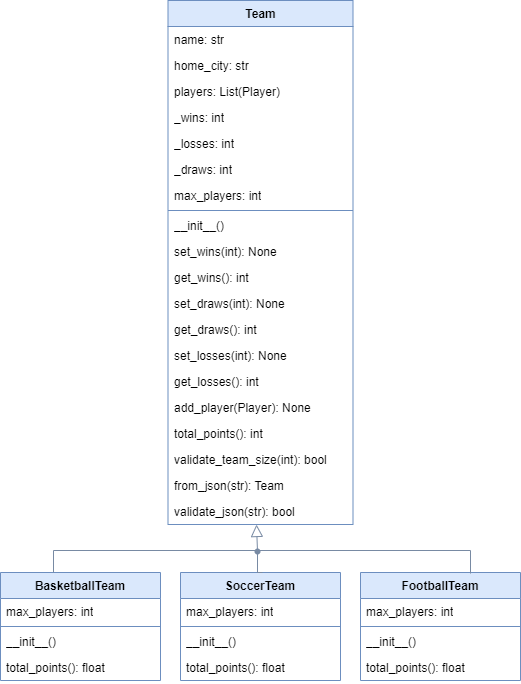

### League Hierarchy

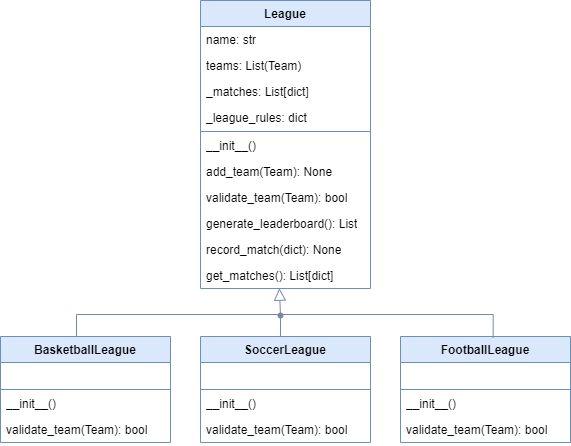